In [6]:
import tensorflow as tf


In [7]:
tf.config.list_physical_devices('GPU')

[]

In [8]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define paths
data_dir = 'leafs'
train_dir = 'leafs/train'
val_dir = 'leafs/val'
test_dir = 'leafs/test'

# Get all files and labels
all_files = []
labels = []

for label in os.listdir(data_dir):
    label_path = os.path.join(data_dir, label)
    if os.path.isdir(label_path):
        for file in os.listdir(label_path):
            all_files.append(os.path.join(label_path, file))
            labels.append(label)

# Split files and labels: first into train+val, then into train, val, and test
train_val_files, test_files, train_val_labels, test_labels = train_test_split(
    all_files, labels, test_size=0.1, stratify=labels, random_state=42
)

train_files, val_files, train_labels, val_labels = train_test_split(
    train_val_files, train_val_labels, test_size=0.2, stratify=train_val_labels, random_state=42
)

# Helper function to move files
def move_files(files, target_dir):
    for file in files:
        if os.path.isfile(file):  # Ensure the file exists
            # Get the label using the parent directory name
            label = os.path.basename(os.path.dirname(file))  # Safer alternative to splitting manually
            label_dir = os.path.join(target_dir, label)
            os.makedirs(label_dir, exist_ok=True)  # Create label directory if it doesn't exist

            target_file_path = os.path.join(label_dir, os.path.basename(file))

            # Only copy if the file doesn't already exist in the target location
            if not os.path.exists(target_file_path):
                shutil.copy(file, target_file_path)  # Copy file to the target directory


# Create directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Move train, validation, and test files
move_files(train_files, train_dir)
move_files(val_files, val_dir)
move_files(test_files, test_dir)


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'leafs'

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from keras.utils import to_categorical
from keras.preprocessing import image
import keras

In [1]:
training_set=keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)


NameError: name 'keras' is not defined

In [5]:
validation_set=keras.utils.image_dataset_from_directory(
    'leafs/val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)


Found 630 files belonging to 10 classes.


In [6]:
!nvidia-smi

Sun Feb 23 15:05:07 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 566.14                 Driver Version: 566.14         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   38C    P3             11W /   30W |       0MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [7]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [8]:
for x,y in training_set:
  print(x.shape)
  print(y.shape)
  break

(32, 128, 128, 3)
(32, 10)


In [9]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Input
from tensorflow.keras.models import Sequential

In [10]:
model=Sequential()
model.add(Input(shape=(128, 128, 3)))

In [11]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu',))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu',))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [16]:
model.add(Dropout(0.25))#To avoid overfitting

In [17]:
from tensorflow.keras.layers import Flatten
model.add(Flatten())

In [18]:
model.add(Dense(units=1500,activation='relu'))

In [19]:
model.add(Dropout(0.4))

In [20]:
#Output Layer
model.add(Dense(units=10,activation='softmax'))

In [21]:
import tensorflow as tf

In [22]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 62, 62, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                    

In [ ]:
training_history=model.fit(training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
 4/79 [>.............................] - ETA: 5:23 - loss: 4.4745 - accuracy: 0.1094

In [30]:
train_loss,train_acc=model.evaluate(training_set)

79/79 [==============================] - 16s 182ms/step - loss: 0.0976 - accuracy: 0.9694


In [31]:
print(train_loss,train_acc)

0.09763941168785095 0.9694444537162781


In [32]:
val_loss,val_acc=model.evaluate(validation_set)

20/20 [==============================] - 4s 108ms/step - loss: 0.4494 - accuracy: 0.8810


In [33]:
print(val_loss,val_acc)

0.44941386580467224 0.8809523582458496


In [34]:
model.save("leafs/trained_model.h5")

In [35]:
model.save("leafs/trained_model.keras")

In [36]:
training_history.history

{'loss': [0.28187206387519836,
  0.37294885516166687,
  0.27275362610816956,
  0.22132253646850586,
  0.23452813923358917,
  0.4532460868358612,
  0.33260753750801086,
  0.18743681907653809,
  0.17274215817451477,
  0.13560837507247925],
 'accuracy': [0.8936507701873779,
  0.8527777791023254,
  0.9059523940086365,
  0.9238095283508301,
  0.9134920835494995,
  0.848809540271759,
  0.882539689540863,
  0.9277777671813965,
  0.936904788017273,
  0.9527778029441833],
 'val_loss': [0.6239001750946045,
  0.46644094586372375,
  0.5233994126319885,
  0.5077447295188904,
  0.4752228856086731,
  0.6143282651901245,
  0.5587677359580994,
  0.41296640038490295,
  0.45622050762176514,
  0.449413925409317],
 'val_accuracy': [0.8158730268478394,
  0.8444444537162781,
  0.8301587104797363,
  0.8476190567016602,
  0.855555534362793,
  0.8238095045089722,
  0.8253968358039856,
  0.8698412775993347,
  0.8650793433189392,
  0.8809523582458496]}

In [37]:
#Recording the data into json
import json
with open("training_hist.json","w") as f:
  json.dump(training_history.history,f)

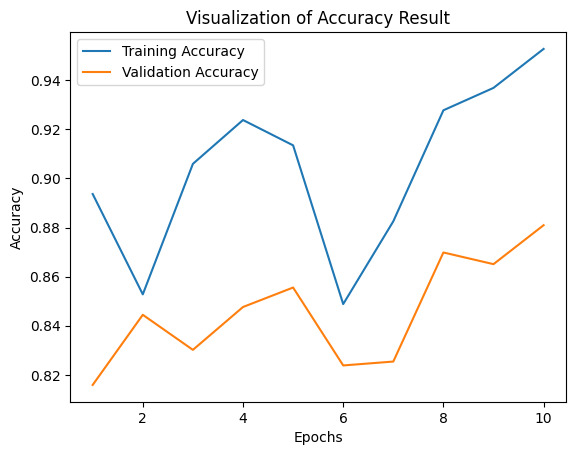

In [38]:
epochs=list(range(1,11))
plt.plot(epochs,training_history.history['accuracy'],label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

In [39]:
class_name = validation_set.class_names
class_name


['Rice_Bacterial_leaf_blight',
 'Rice_BrownSpot',
 'Rice_Healthy',
 'Rice_LeafBlast',
 'Rice_LeafScald',
 'Rice_NarrowBrownSpot',
 'Wheat_BrownRust',
 'Wheat_Healthy',
 'Wheat_Septoria',
 'Wheat_YellowSmut']

In [40]:
test_set =keras.utils.image_dataset_from_directory(
    'leafs/val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 630 files belonging to 10 classes.


In [41]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

20/20 [==============================] - 3s 149ms/step


(array([[9.8951095e-01, 7.8277057e-03, 5.9471489e-04, ..., 6.7987588e-07,
         3.1700542e-06, 1.0543328e-06],
        [9.9280846e-01, 7.1664522e-03, 8.3626833e-07, ..., 7.9960998e-09,
         9.8925888e-08, 3.9427228e-08],
        [9.9967706e-01, 1.5354135e-04, 6.2916774e-06, ..., 4.1473879e-08,
         9.2284147e-08, 4.7229697e-08],
        ...,
        [6.0665144e-08, 2.6631160e-05, 2.0954049e-07, ..., 8.3126821e-07,
         8.0690847e-07, 9.9840719e-01],
        [1.6512175e-05, 3.3378659e-04, 2.5794714e-05, ..., 2.4913719e-03,
         1.3908705e-03, 9.9258232e-01],
        [3.1455180e-08, 1.7440869e-06, 2.2868704e-08, ..., 2.1368246e-06,
         1.2743025e-06, 9.9994075e-01]], dtype=float32),
 (630, 10))

In [42]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [43]:
predicted_categories

<tf.Tensor: shape=(630,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 5,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 5, 2, 3, 2, 2, 5, 3, 1, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 1, 3, 2, 3, 3, 1, 1, 5, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 2,
       3, 3, 3, 3, 3, 1, 3, 3, 1, 1, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
     

In [44]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(630, 10), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [45]:
from sklearn.metrics import classification_report , confusion_matrix
import tensorflow as tf
import numpy as np


In [46]:
predicted_categories = tf.argmax(y_pred,axis=1)
predicted_categories = predicted_categories.numpy()


In [47]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
true_categories = true_categories.numpy()

In [48]:
if true_categories.ndim == 2:  # Check if it's 2D (multilabel-indicator)
    true_categories = np.argmax(true_categories, axis=1)  # Convert to multiclass

In [49]:
# Precision Recall Fscore
print(classification_report(true_categories,predicted_categories,target_names=class_name))

                            precision    recall  f1-score   support

Rice_Bacterial_leaf_blight       1.00      0.97      0.98        63
            Rice_BrownSpot       0.74      0.86      0.79        63
              Rice_Healthy       0.82      0.95      0.88        63
            Rice_LeafBlast       0.84      0.65      0.73        63
            Rice_LeafScald       0.95      0.94      0.94        63
      Rice_NarrowBrownSpot       0.89      0.87      0.88        63
           Wheat_BrownRust       0.98      0.84      0.91        63
             Wheat_Healthy       0.94      0.81      0.87        63
            Wheat_Septoria       0.89      0.94      0.91        63
          Wheat_YellowSmut       0.82      0.98      0.89        63

                  accuracy                           0.88       630
                 macro avg       0.89      0.88      0.88       630
              weighted avg       0.89      0.88      0.88       630



In [50]:
cm  = confusion_matrix(true_categories,predicted_categories)
cm.shape

(10, 10)

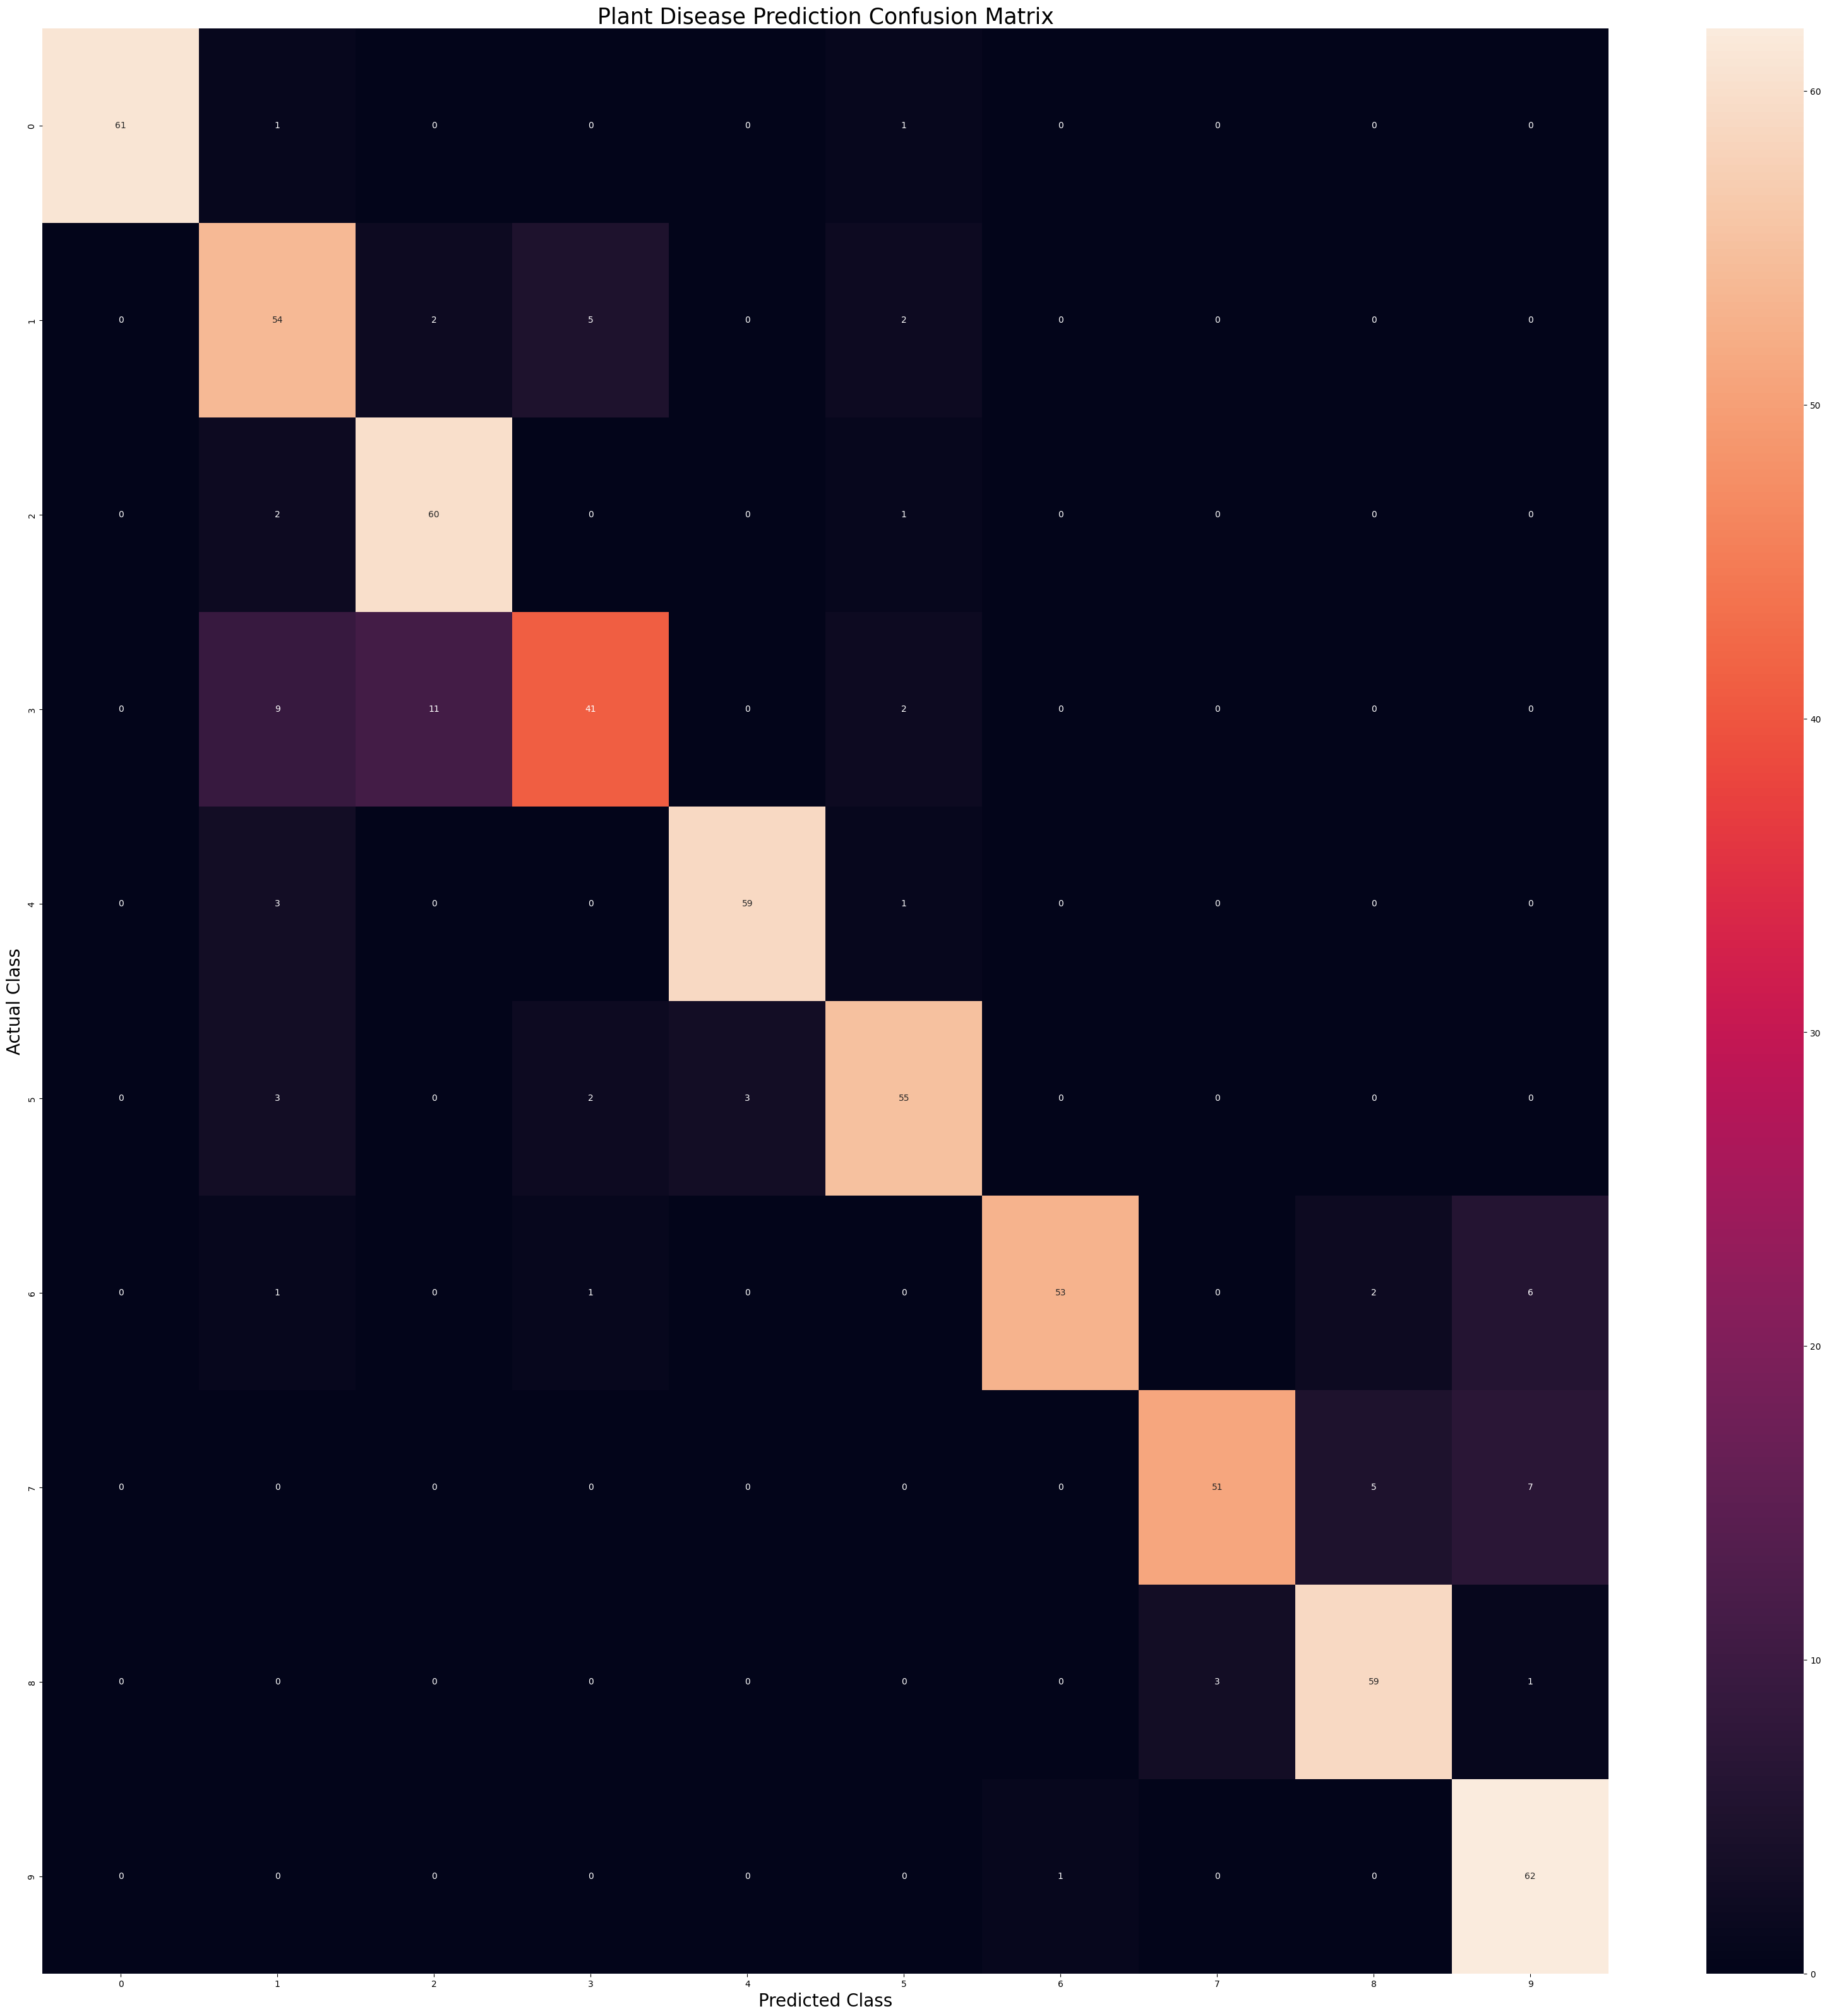

In [51]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()